# Statistical study of the subset sum problem
## Metaheuristic Problem Solving | MUIIA

### Imports
---

In [1180]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### READ & PREPROCESS DATAFRAME
---

In [1181]:
s = 1000
case = 1
prob_type = "medium" # high | medium | low


pathFiles = f"./../src/case{case}/z{s}/{prob_type}prob"
pathFigures = f"./../stats/plots"

In [1182]:
def read_csv_result(path):
    return pd.read_csv(f'{path}/result.csv')

def read_and_combine_exec_csv(pathFolder, numberFiles):
    strs = [f'{pathFolder}/result{x+1}.csv' for x in range(numberFiles)]
    return pd.concat(map(pd.read_csv, strs), ignore_index=True)

In [1183]:
""" READ & PREPROCESS DATAFRAME """
# reading csv file
df = read_csv_result(pathFiles)

# merging two csv files
dff = read_and_combine_exec_csv(pathFiles+"/executions", 30)



In [1184]:
""" VARIABLES GA """
C = 0

if (s == 100): 
    C = 3677.0
if (s == 1000):
    C = 366097.0
if (s == 10000):
    C = 37957325.0

# C = C_z10000

In [1185]:
""" SET OPTIMAL COLUMN """
df["optimal"] = np.where(df["bestf"] == C, 1, 0)

In [1186]:
""" NORMALIZE DF """
max_bound = C
min_bound = min([df['bestf'].min(),df['worstf'].min(),df['avgf'].min()])

# Method 1
def normalize(df, column, min, max):
    # min = df[column].min()
    # max = C
    return ((df[column] - min) / (max - min))

# normalice df
df["bestf"] = normalize(df,"bestf",min_bound, max_bound)
df["worstf"] = normalize(df,"worstf",min_bound, max_bound)
df["avgf"] = normalize(df,"avgf",min_bound, max_bound)

# Method 2

# columns_to_normalize = ['bestf', 'worstf', 'avgf']
# df[columns_to_normalize] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[columns_to_normalize])

In [1187]:
""" NORMALIZE DFF """
max_bound = C
min_bound = min([dff['bestf'].min(),dff['worstf'].min(),dff['avgf'].min()])

# normalice dff
# dff[columns_to_normalize] = MinMaxScaler(feature_range=(0, 1)).fit_transform(dff[columns_to_normalize]
dff["bestf"] = normalize(dff,"bestf",min_bound, max_bound)
dff["worstf"] = normalize(dff,"worstf",min_bound, max_bound)
dff["avgf"] = normalize(dff,"avgf",min_bound, max_bound)

In [1188]:
# Get index of best fitness executions
optimalIndx = df["optimal"] == 1

# Get optimal and not optimal dataset of mean dataset
optimalRes = df[optimalIndx]
notOptimalRes = df[~optimalIndx]

# Get optimal and not optimal dataset of full dataset
optimalResFull = dff[dff["exec"].isin(optimalRes["exec"])]
notOptimalResFull = dff[dff["exec"].isin(notOptimalRes["exec"])]

In [1189]:
""" SET OPTIMAL COLUMN DFF"""
dff["optimal"] = np.where(dff["exec"].isin(optimalRes["exec"]), 1, 0)

In [1190]:
duration_mean = round(df["duration"].mean(),2)
optimal_n = round(df[df["optimal"] == 1]["exec"].count(),4)
avg_f_mean = round(dff["avgf"].mean(),4)
avg_w_mean = round(dff["worstf"].mean(),4)
avg_b_mean = round(dff["bestf"].mean(),10)

print("""
Avg f mean      - {}
Avg worst mean  - {}
Avg best mean  - {}
Optimal n       - {}
Duration mean   - {}
""".format(avg_f_mean, avg_w_mean, avg_b_mean,optimal_n,duration_mean))


Avg f mean      - 0.9322
Avg worst mean  - 0.7561
Avg best mean  - 0.9980249271
Optimal n       - 30
Duration mean   - 14.6



In [1191]:
df.describe()

,exec,bestf,worstf,avgf,endstep,duration,optimal
count,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.0
mean,15.500000,1.0,0.748054,0.867628,995.533333,14.600000,1.0
std,8.803408,0.0,0.243643,0.124387,886.657953,15.808335,0.0
min,1.000000,1.0,0.000000,0.582878,101.000000,1.000000,1.0
25%,8.250000,1.0,0.646484,0.829132,376.750000,3.500000,1.0
50%,15.500000,1.0,0.853237,0.924810,872.500000,11.500000,1.0
75%,22.750000,1.0,0.896763,0.949590,1154.000000,19.500000,1.0
max,30.000000,1.0,0.965402,0.982478,3535.000000,81.000000,1.0


### PLOTS
---

#### BAR PLOTS

In [1192]:
# df.iloc[1:5,:].head()

In [1193]:
# sns.set_theme(style="darkgrid")

# f, ax = plt.subplots(figsize=(15, 5))
# sns.despine(f)

# sns.barplot(x="exec", y="bestf",data=df, hue="optimal")

# # Add titles to the plot
# plt.title("Comparison of Best Fitness")
# plt.xlabel("Execution")
# plt.ylabel("Best Fitness")
# plt.legend()

# # Show plot
# plt.show()

In [1194]:
# sns.set_theme(style="darkgrid")

# f, ax = plt.subplots(figsize=(15, 5))
# sns.despine(f)

# sns.lineplot(x="exec", y="avgf",data=df, hue="optimal")

# # Add titles to the plot
# plt.title("Comparison of Average Fitness")
# plt.xlabel("Execution")
# plt.ylabel("Average Fitness")
# plt.legend()

# # Show plot
# plt.show()

In [1195]:
# sns.set_theme(style="darkgrid")

# f, ax = plt.subplots(figsize=(15, 5))
# sns.despine(f)

# sns.barplot(x="exec", y="worstf",data=df, hue="optimal")

# # Add titles to the plot
# plt.title("Comparison of Worst Fitness")
# plt.xlabel("Execution")
# plt.ylabel("Worst Fitness")
# plt.legend()

# # Show plot
# plt.show()

#### HIST PLOTS

In [1196]:
# f, ax = plt.subplots(figsize=(20, 10))
# sns.despine(f)

# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="exec", y="worstf", data=dff)
# sns.despine(offset=10, trim=True)

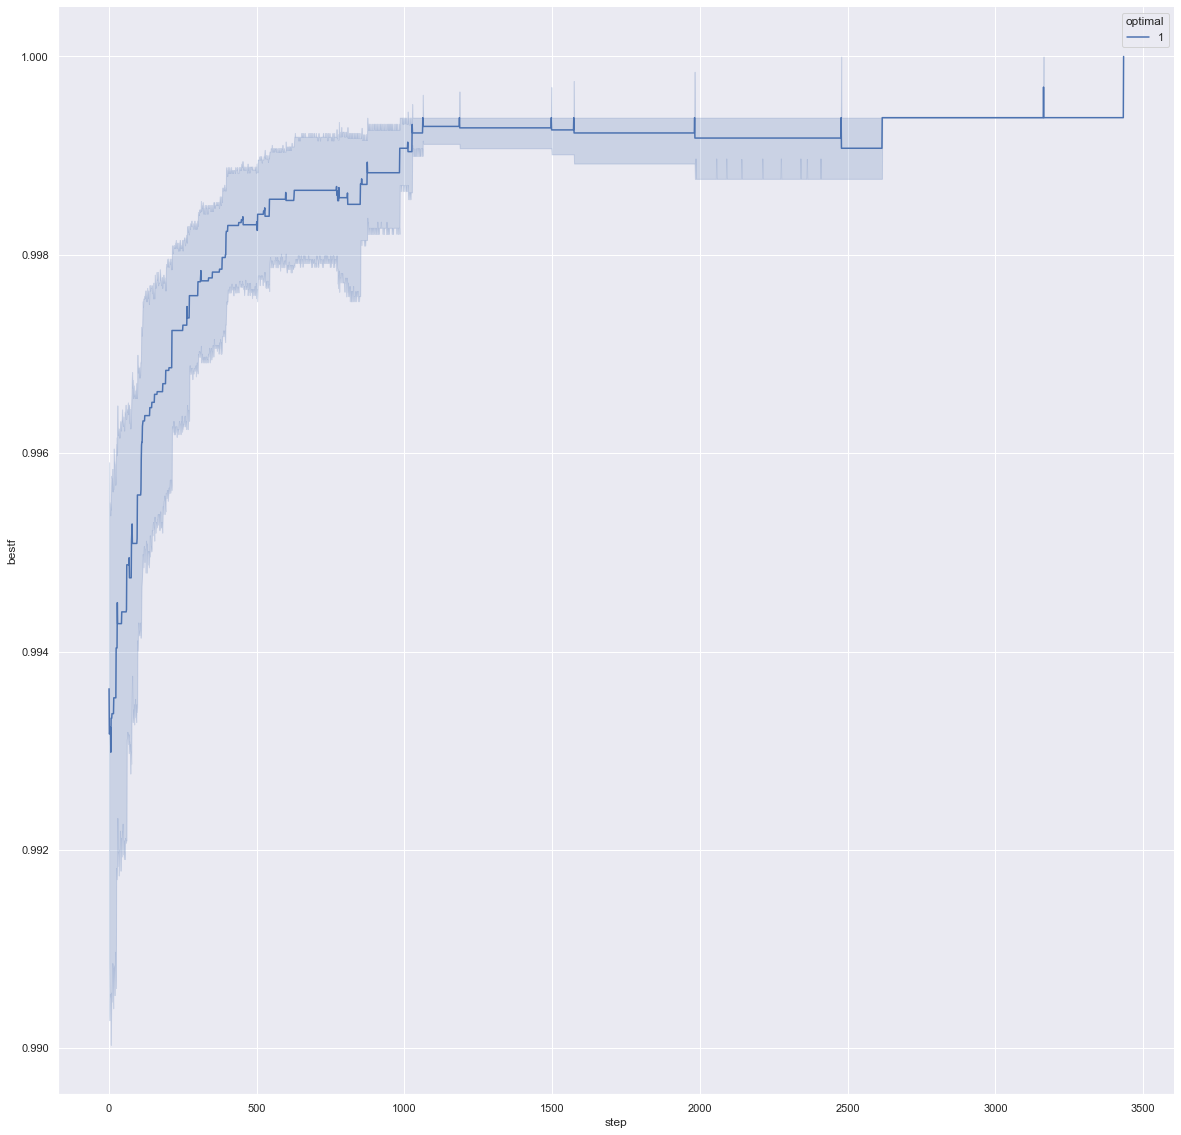

In [1199]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 20))
sns.despine(f)

# Draw a nested boxplot to show bills by day and time
# g = sns.lineplot(x="step", y="avgf", data=dff, hue="exec", label="Fitness average")
g = sns.lineplot(x="step", y="bestf", data=dff, hue="optimal")

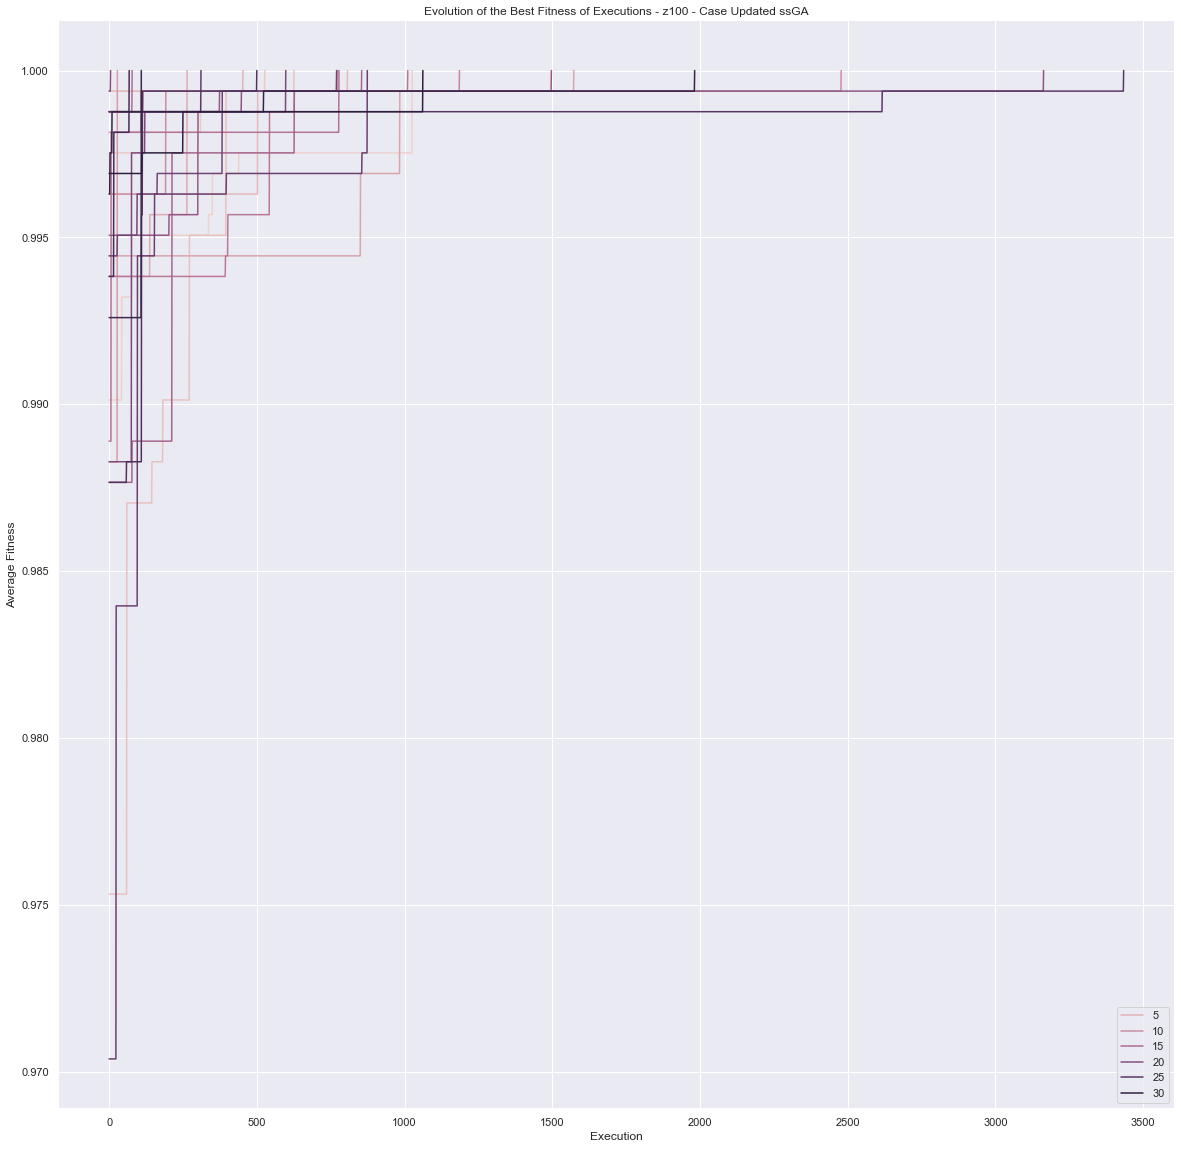

In [1198]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 20))
sns.despine(f)

# Draw a nested boxplot to show bills by day and time
# g = sns.lineplot(x="step", y="avgf", data=dff, hue="exec", label="Fitness average")
g = sns.lineplot(x="step", y="bestf", data=dff, hue="exec")
# sns.despine(offset=10)

# Add titles to the plot
study_case = "Basic ssGA" if case == 1 else "Updated ssGA"

plt.title(f"Evolution of the Best Fitness of Executions - z{s} - Case {study_case}")
plt.xlabel("Execution")
plt.ylabel("Average Fitness")
plt.legend()

# Show plot
plt.show()
# Save plot
pathPlot =  f'{pathFigures}/evolutionBest/evolutionFitnesExec-z{s}-case{case}.png'
g.get_figure().savefig(pathPlot)